# Project 3: Web APIs & NLP

---
# Part 2 - Data Cleaning, EDA
### Notebook 2 - Contents:

**[2.1 Data Inspection and Cleaning](#2.1-Data-Inspection-and-Cleaning)** <br>
[2.1.1 The strategy for cleanup](#2.1.1-The-strategy-for-cleanup)<br>
[2.1.2 Create `df` dataframe](#2.1.2-Create-df-dataframe)<br>
[2.1.3 Create `df_text` dataframe](#2.1.3-Create-df_text-dataframe)<br>
[2.1.4 Text Cleaning](#2.1.4-Text-Cleaning)<br>
    
**[2.2 EDA](#2.2-EDA)** <br>
[2.2.1 Post length and Post word count](#2.2.1-Post-length-and-Post-word-count)<br>
[2.2.2 Relationship between post length, score, upvote ratio](#2.2.2-Relationship-between-post-length,-score,-upvote-ratio)<br>
[2.2.3 Category with the most activity](#2.2.3-Category-with-the-most-activity)<br>
[2.2.4 Text Preprocessing Strategy](#2.2.4-Text-Preprocessing-Strategy)<br>
[2.2.5 Feature Word Frequency](#2.2.5-Feature-Word-Frequency)<br>
[2.2.6 Exploring n-grams](#2.2.6-Exploring-n-grams)<br>
[2.2.7 Adding on to stopwords list](#2.2.7-Adding-on-to-stopwords-list)<br>
    
**[2.3 Sentiment Analysis](#2.3-Sentiment-Analysis)** <br>

**[2.4 Notebook Summary](#2.3-Notebook-Summary)** <br>

---

## 2.1 Data Inspection and Cleaning

Import required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import words
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import string
import nltk
from spellchecker import SpellChecker
import contractions
import pickle

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

Import csv data files:

In [2]:
#import posts datasets
d_sc = pd.read_csv('../data/data_sc.csv')
d_engr = pd.read_csv('../data/data_engr.csv')

#import comments datasets
d_sc_comm = pd.read_csv('../data/data_sc_comm.csv')
d_engr_comm = pd.read_csv('../data/data_engr_comm.csv')

---

### 2.1.1 The strategy for cleanup
For all datasets (cleanup done individually:
1. General cleaning
* We will do a preliminary round of general inspection and cleanup - missing values, duplicates, etc.<br>

2. Text-based cleaning
* Address text errors
* Feature a new column that combines title and selftext, so we can use that column to carry out countvectorizing.

At the end of the cleaning, we will concat the dataframes to form 2 main dfs:
* `df` - Only contains datascience and dataengineering **posts** information, and contains more features.
* `df_text` - Contains datascience and dataengineering **posts** and **comments** information, and we will only keep the subreddit name column, and title_selftext column (title and post content).

---
### 2.1.2 Create `df` dataframe
Import r/datascience and r/dataengineering posts dataset, concat them to form a main dataframe.

##### r/datascience

In [3]:
print(d_sc.shape)
d_sc.head(2)

(961, 16)


,title,id,author,created_utc,distinguished,edited,is_self,link_flair_text,num_comments,saved,score,selftext,stickied,upvote_ratio,url,subreddit
0,Weekly Entering & Transitioning - Thread 31 Ju...,15e5iw6,AutoModerator,1.690776e+09,NaN,False,True,NaN,28,False,2,\n\nWelcome to this week's entering & transit...,True,1.00,https://www.reddit.com/r/datascience/comments/...,datascience
1,"R programmers, what are the greatest issues yo...",15g96dc,joaoareias,1.690984e+09,NaN,False,True,Education,262,False,169,I'm a Data Scientist with a computer science b...,False,0.96,https://www.reddit.com/r/datascience/comments/...,datascience


##### r/dataengineering

In [4]:
print(d_engr.shape)
d_engr.head(2)

(963, 16)


,title,id,author,created_utc,distinguished,edited,is_self,link_flair_text,num_comments,saved,score,selftext,stickied,upvote_ratio,url,subreddit
0,Monthly General Discussion - Aug 2023,15fgn9y,AutoModerator,1.690906e+09,NaN,False,True,Discussion,2,False,3,This thread is a place where you can share thi...,True,1.0,https://www.reddit.com/r/dataengineering/comme...,dataengineering
1,Quarterly Salary Discussion - Jun 2023,13xldpd,AutoModerator,1.685635e+09,NaN,False,True,Career,213,False,83,This is a recurring thread that happens quarte...,True,1.0,https://www.reddit.com/r/dataengineering/comme...,dataengineering


##### Combined dataframe `df`

In [5]:
df = pd.concat(objs = [d_sc, d_engr], axis=0)

In [6]:
# Check proportions
df['subreddit'].value_counts()

dataengineering    963
datascience        961
Name: subreddit, dtype: int64

In [7]:
print(df.shape)
df.head(2)

(1924, 16)


,title,id,author,created_utc,distinguished,edited,is_self,link_flair_text,num_comments,saved,score,selftext,stickied,upvote_ratio,url,subreddit
0,Weekly Entering & Transitioning - Thread 31 Ju...,15e5iw6,AutoModerator,1.690776e+09,NaN,False,True,NaN,28,False,2,\n\nWelcome to this week's entering & transit...,True,1.00,https://www.reddit.com/r/datascience/comments/...,datascience
1,"R programmers, what are the greatest issues yo...",15g96dc,joaoareias,1.690984e+09,NaN,False,True,Education,262,False,169,I'm a Data Scientist with a computer science b...,False,0.96,https://www.reddit.com/r/datascience/comments/...,datascience


---
#### Inspect columns
Write some functions to inspect dataframe and certain columns:

In [8]:
def inspect_df(df):
    
    #Check for nulls
    null_counts = df.isnull().sum()
    null_info_df = null_counts[null_counts > 0].reset_index()
    null_info_df.columns = ['Column', 'Null Count']
    print(null_info_df)

    #Check percentage of nulls 
    null_percentages = (df.isnull().mean() * 100).round(2)
    null_info_p = null_percentages[null_percentages > 0].reset_index()
    null_info_p.columns = ['Column', 'Null Percentage']
    print(null_info_p)
    
    #check for duplicates
    print(f"No of duplicates: {df.duplicated().sum()}")

In [9]:
def inspect_col(df, subredditname):
    print(df[df['subreddit']== subredditname]['subreddit'].unique())
    print(df[df['link_flair_text']== subredditname]['link_flair_text'].unique())

#### Address missing values

In [10]:
inspect_df(df)

            Column  Null Count
0           author          13
1    distinguished        1924
2  link_flair_text           5
3         selftext         222
            Column  Null Percentage
0           author             0.68
1    distinguished           100.00
2  link_flair_text             0.26
3         selftext            11.54
No of duplicates: 0


##### Findings
* There are missing values in 4 columns in total.
* There are no duplicates.
* Since 'distinguished' column completely null (and also not essential), we will drop the column.
* For 'author' and 'link_flair_text' column, since null percentages are under 1% (less than 5%), we will drop the missing rows.
* For the 'selftext' column nulls, we will keep them since total null percentage is 11.54% and is > 5%. We can impute "nil" instead.

In [11]:
#drop 'distinguished' column
df.drop(['distinguished'], axis=1, inplace=True)

In [12]:
#Calculate percentage of null rows after dropping distinguished
len(df[df.isna().any(axis=1)]) / len(df.index) * 100

12.422037422037423

The above null percentage is too big for us to simply drop the rows. We will address the nulls as mentioned earlier.

In [13]:
# Drop null rows for 'author' and 'link_flair_text'
df.dropna(subset=['author', 'link_flair_text'], inplace=True)

# Fill NaN values in 'selftext' with 'nil'
df['selftext'].fillna(value='nil', inplace=True)

In [14]:
# Check proportions
df['subreddit'].value_counts()

dataengineering    956
datascience        950
Name: subreddit, dtype: int64

In [15]:
print(df.shape)
df.head()

(1906, 15)


,title,id,author,created_utc,edited,is_self,link_flair_text,num_comments,saved,score,selftext,stickied,upvote_ratio,url,subreddit
1,"R programmers, what are the greatest issues yo...",15g96dc,joaoareias,1.690984e+09,False,True,Education,262,False,169,I'm a Data Scientist with a computer science b...,False,0.96,https://www.reddit.com/r/datascience/comments/...,datascience
2,U.S. Hiring Managers: how diverse is your appl...,15gezo5,dantzigismyhero,1.690997e+09,False,True,Discussion,42,False,38,We are currently hiring for a mid-level DS and...,False,0.89,https://www.reddit.com/r/datascience/comments/...,datascience
3,Do I need a masters?,15gmte5,Odd-Company-1440,1.691017e+09,False,True,Education,4,False,5,I am going into my second year as a statistics...,False,1.00,https://www.reddit.com/r/datascience/comments/...,datascience
4,How do you describe your job when someone asks...,15gkc1y,briannalynn24,1.691009e+09,False,True,Discussion,24,False,5,I recently got a job as a data scientist and I...,False,0.86,https://www.reddit.com/r/datascience/comments/...,datascience
5,How I quickly rose to senior data scientist an...,15fqkuj,on_the_mark_data,1.690928e+09,False,True,Discussion,89,False,208,TL;DR You need to drive outsized value beyond ...,False,0.86,https://www.reddit.com/r/datascience/comments/...,datascience


In [16]:
print('SUBREDDIT CATEGORIES FOR R/DATASCIENCE:')
print(df[df['subreddit']=='datascience']['link_flair_text'].unique())

SUBREDDIT CATEGORIES FOR R/DATASCIENCE:
['Education' 'Discussion' 'Career' 'Projects' 'Networking' 'Tooling'
 'Fun/Trivia' 'Meta']


In [17]:
print('SUBREDDIT CATEGORIES FOR R/DATAENGINEERING:')
df[df['subreddit']=='dataengineering']['link_flair_text'].unique()

SUBREDDIT CATEGORIES FOR R/DATAENGINEERING:


array(['Discussion', 'Career', 'Blog', 'Help', 'Meme', 'Interview',
       'Open Source', 'Personal Project Showcase', 'Meta'], dtype=object)

---
#### Summary statistics - r/datascience

In [18]:
df[df['subreddit']=='datascience'].describe(include=['int','float'])

,created_utc,num_comments,score,upvote_ratio
count,9.500000e+02,950.000000,950.000000,950.000000
mean,1.690037e+09,12.495789,14.553684,0.744747
std,6.039534e+05,31.446938,60.407317,0.244756
min,1.688885e+09,0.000000,0.000000,0.130000
25%,1.689606e+09,1.000000,0.000000,0.500000
50%,1.690031e+09,3.000000,1.000000,0.800000
75%,1.690550e+09,10.000000,5.000000,1.000000
max,1.691024e+09,472.000000,1209.000000,1.000000


In [19]:
df[df['subreddit']=='datascience'].describe(include=['object','bool'])

,title,id,author,edited,is_self,link_flair_text,saved,selftext,stickied,url,subreddit
count,950,950,950,950,950,950,950,950,950,950,950
unique,947,950,852,67,2,8,1,854,1,950,1
top,Seeking Participants for AI-related Survey,15g96dc,SeriouslySally36,False,True,Discussion,False,nil,False,https://www.reddit.com/r/datascience/comments/...,datascience
freq,2,1,5,884,865,313,950,97,950,1,950


#### Summary statistics - r/dataengineering

In [20]:
df[df['subreddit']=='dataengineering'].describe(include=['int','float'])

,created_utc,num_comments,score,upvote_ratio
count,9.560000e+02,956.000000,956.000000,956.000000
mean,1.689424e+09,12.324268,15.570084,0.861695
std,9.576543e+05,23.464967,47.607561,0.180396
min,1.685635e+09,0.000000,0.000000,0.170000
25%,1.688594e+09,1.000000,1.000000,0.780000
50%,1.689446e+09,5.000000,3.000000,0.935000
75%,1.690291e+09,13.000000,11.000000,1.000000
max,1.691049e+09,222.000000,800.000000,1.000000


In [21]:
df[df['subreddit']=='dataengineering'].describe(include=['object','bool'])

,title,id,author,edited,is_self,link_flair_text,saved,selftext,stickied,url,subreddit
count,956,956,956,956,956,956,956,956,956,956,956
unique,956,956,776,77,2,9,1,833,2,956,1
top,Monthly General Discussion - Aug 2023,15fgn9y,itty-bitty-birdy-tb,False,True,Discussion,False,nil,False,https://www.reddit.com/r/dataengineering/comme...,dataengineering
freq,1,1,6,880,823,314,956,124,954,1,956


##### Findings
* **Total posts** - balanced btwn both subreddits
    * r/datascience: 950 posts
    * r/dataengineering: 956 posts
* **The top post**
    * r/datascience top posts: 472 comments, 1209 score
    * r/dataengineering: 222 comments, 800 score
* **Average score of posts**
    * r/datascience: 14.55 score
    * r/dataengineering: 15.57 score
* **Number of Unique Authors**
    * r/datascience: 852
    * r/dataengineering: 776

Due to the limitation on total no of posts set by reddit, we are unable to tell which subreddit has more posts / comments throughout its full history. Both subreddits seem quite balanced, although r/dataengineering seems to have slightly more activity, having more edited, saved and stickied posts as compared to r/datascience. As data engineering is the newer branch of data science, there could be more interest and discussion around it. 

On the other hand, data science has more unique authors than data engineering. We would expect this, since data science is the more established field which people would be more familiar with.

---
### 2.1.3 Create `df_text` dataframe
Import r/datascience and r/dataengineering comments dataset. From all 4 dataframes, (comments + posts df for r/datascience and r/dataengineering) extract only text columns and concat them to form a dataframe mainly for text analysis.

In [22]:
#r/datascience  comments dataset
print(d_sc_comm.shape)
d_sc_comm.head(2)

(12403, 13)


,body,body_html,subreddit_id,author,created_utc,distinguished,edited,id,saved,score,stickied,submission,subreddit
0,Hello.\n\nI’m about to start my BS in Data Sci...,"<div class=""md""><p>Hello.</p>\n\n<p>I’m about ...",t5_2sptq,Competitive_Pay_9117,1.690864e+09,NaN,False,juawerx,False,2,False,15e5iw6,datascience
1,"Hey guys, I'm graduating from my bachelor's in...","<div class=""md""><p>Hey guys, I&#39;m graduatin...",t5_2sptq,Emperorofweirdos,1.690962e+09,NaN,False,jugdppb,False,2,False,15e5iw6,datascience


In [23]:
#r/dataengineering comments dataset
print(d_engr_comm.shape)
d_engr_comm.head(2)

(11740, 13)


,body,body_html,subreddit_id,author,created_utc,distinguished,edited,id,saved,score,stickied,submission,subreddit
0,How can I learn how to understand the EXPLAIN ...,"<div class=""md""><p>How can I learn how to unde...",t5_36en4,third_dude,1.690915e+09,NaN,False,judmcvy,False,1,False,15fgn9y,dataengineering
1,"1. Staff Data Engineer\n2. 11y in software, 2....","<div class=""md""><ol>\n<li>Staff Data Engineer<...",t5_36en4,BklynTwinMom,1.685673e+09,NaN,False,jmka8w8,False,28,False,13xldpd,dataengineering


Concat both datasets for cleaning:

In [24]:
df_comm = pd.concat(objs = [d_sc_comm, d_engr_comm], axis=0)

In [25]:
# Check proportions
df_comm['subreddit'].value_counts()

datascience        12403
dataengineering    11740
Name: subreddit, dtype: int64

In [26]:
print(df_comm.shape)
df_comm.head(2)

(24143, 13)


,body,body_html,subreddit_id,author,created_utc,distinguished,edited,id,saved,score,stickied,submission,subreddit
0,Hello.\n\nI’m about to start my BS in Data Sci...,"<div class=""md""><p>Hello.</p>\n\n<p>I’m about ...",t5_2sptq,Competitive_Pay_9117,1.690864e+09,NaN,False,juawerx,False,2,False,15e5iw6,datascience
1,"Hey guys, I'm graduating from my bachelor's in...","<div class=""md""><p>Hey guys, I&#39;m graduatin...",t5_2sptq,Emperorofweirdos,1.690962e+09,NaN,False,jugdppb,False,2,False,15e5iw6,datascience


In [27]:
inspect_df(df_comm)

          Column  Null Count
0         author         547
1  distinguished       23928
          Column  Null Percentage
0         author             2.27
1  distinguished            99.11
No of duplicates: 0


##### Findings
* There are missing values in 2 columns in total.
* There are no duplicates.
* Since 'distinguished' column is almost completely null (and also not essential), we will drop the column.
* For 'author' column, since null percentage is 2.27% (less than 5%), we will drop the missing rows.

In [28]:
#drop 'distinguished' column
df_comm.drop(['distinguished'], axis=1, inplace=True)

In [29]:
# Drop null rows for 'author' and 'link_flair_text'
df_comm.dropna(subset=['author'], inplace=True)

print(df_comm.shape)
df_comm.head()

(23596, 12)


,body,body_html,subreddit_id,author,created_utc,edited,id,saved,score,stickied,submission,subreddit
0,Hello.\n\nI’m about to start my BS in Data Sci...,"<div class=""md""><p>Hello.</p>\n\n<p>I’m about ...",t5_2sptq,Competitive_Pay_9117,1.690864e+09,False,juawerx,False,2,False,15e5iw6,datascience
1,"Hey guys, I'm graduating from my bachelor's in...","<div class=""md""><p>Hey guys, I&#39;m graduatin...",t5_2sptq,Emperorofweirdos,1.690962e+09,False,jugdppb,False,2,False,15e5iw6,datascience
2,Can I get a job as a fresher in data science?\...,"<div class=""md""><p>Can I get a job as a freshe...",t5_2sptq,Luo-yi-,1.690796e+09,False,ju6k0p5,False,1,False,15e5iw6,datascience
3,Is it a good idea and possible to get a MS in ...,"<div class=""md""><p>Is it a good idea and possi...",t5_2sptq,slimjimmy1928,1.690821e+09,False,ju7yvce,False,0,False,15e5iw6,datascience
4,I am finishing my PhD program in which I did ~...,"<div class=""md""><p>I am finishing my PhD progr...",t5_2sptq,tunamouse,1.690829e+09,False,ju8lv71,False,0,False,15e5iw6,datascience


---
#### Concat only title_selftext and subreddit columns of `df` and `df_comm`

##### df

In [30]:
df['title_selftext'] = df['title'] + ' ' + df['selftext']
df.head()

,title,id,author,created_utc,edited,is_self,link_flair_text,num_comments,saved,score,selftext,stickied,upvote_ratio,url,subreddit,title_selftext
1,"R programmers, what are the greatest issues yo...",15g96dc,joaoareias,1.690984e+09,False,True,Education,262,False,169,I'm a Data Scientist with a computer science b...,False,0.96,https://www.reddit.com/r/datascience/comments/...,datascience,"R programmers, what are the greatest issues yo..."
2,U.S. Hiring Managers: how diverse is your appl...,15gezo5,dantzigismyhero,1.690997e+09,False,True,Discussion,42,False,38,We are currently hiring for a mid-level DS and...,False,0.89,https://www.reddit.com/r/datascience/comments/...,datascience,U.S. Hiring Managers: how diverse is your appl...
3,Do I need a masters?,15gmte5,Odd-Company-1440,1.691017e+09,False,True,Education,4,False,5,I am going into my second year as a statistics...,False,1.00,https://www.reddit.com/r/datascience/comments/...,datascience,Do I need a masters? I am going into my second...
4,How do you describe your job when someone asks...,15gkc1y,briannalynn24,1.691009e+09,False,True,Discussion,24,False,5,I recently got a job as a data scientist and I...,False,0.86,https://www.reddit.com/r/datascience/comments/...,datascience,How do you describe your job when someone asks...
5,How I quickly rose to senior data scientist an...,15fqkuj,on_the_mark_data,1.690928e+09,False,True,Discussion,89,False,208,TL;DR You need to drive outsized value beyond ...,False,0.86,https://www.reddit.com/r/datascience/comments/...,datascience,How I quickly rose to senior data scientist an...


In [31]:
df_tst = df[['subreddit', 'title_selftext']]
print(df_tst.shape)
df_tst.head()

(1906, 2)


,subreddit,title_selftext
1,datascience,"R programmers, what are the greatest issues yo..."
2,datascience,U.S. Hiring Managers: how diverse is your appl...
3,datascience,Do I need a masters? I am going into my second...
4,datascience,How do you describe your job when someone asks...
5,datascience,How I quickly rose to senior data scientist an...


##### df_comm

In [32]:
df_comm_tst = df_comm[['subreddit', 'body']]
df_comm_tst.rename(columns={'body': 'title_selftext'}, inplace=True)

print(df_comm_tst.shape)
df_comm_tst.head()

(23596, 2)


,subreddit,title_selftext
0,datascience,Hello.\n\nI’m about to start my BS in Data Sci...
1,datascience,"Hey guys, I'm graduating from my bachelor's in..."
2,datascience,Can I get a job as a fresher in data science?\...
3,datascience,Is it a good idea and possible to get a MS in ...
4,datascience,I am finishing my PhD program in which I did ~...


##### concat

In [33]:
df_text = pd.concat(objs = [df_tst, df_comm_tst], axis=0)

In [34]:
# Check proportions
df_text['subreddit'].value_counts()

datascience        13052
dataengineering    12450
Name: subreddit, dtype: int64

In [35]:
print(df_text.shape)
df_text.head()

(25502, 2)


,subreddit,title_selftext
1,datascience,"R programmers, what are the greatest issues yo..."
2,datascience,U.S. Hiring Managers: how diverse is your appl...
3,datascience,Do I need a masters? I am going into my second...
4,datascience,How do you describe your job when someone asks...
5,datascience,How I quickly rose to senior data scientist an...


---
### 2.1.4 Text Cleaning

#### Addressing text columns

General Text-cleaning to be done:
* Lowercasing the data
* Removing Puncuatations
* Removing Numbers
* Removing extra space
* Replacing the repetitions of punctations
* Removing Emojis, emoticons
* Removing links
* Removing Contractions

On inspecting the data, I noticed some errors in the extracted text that should be cleaned. For example:
* The word "I'm" is reflected as "Iâ€™m".
* Line breaks are reflected as "\n"
* Get rid of "&#x200B ;" text that indicates a spacing.

In [36]:
def clean_text(df, col):
    # Remove hyperlinks
    df[col] = df[col].apply(lambda x: re.sub(r"http\S+|www\S+", '', x))

    #fix contractions
    df[col] = df[col].apply(lambda x: contractions.fix(x))

    # Make all text lowercase
    df[col] = df[col].str.lower()

    # Remove words that contain "http"
    df[col] = df[col].apply(lambda x: ' '.join([word for word in x.split() if 'http' not in word]))
    
    # Remove unwanted characters after removing hyperlinks
    df[col] = df[col].replace({
        r"Iâ€™m": "'", 
        r"&#x200B;": "",
        r"\\n": "",
        r"&#x200b;": "",
        r":[^:\s]+:": ""  # Remove emoticons enclosed in colons
    }, regex=True)

    # Remove single-character words (except for "a" and "i")
    df[col] = df[col].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 1 or word in ['a', 'i']]))
    
    # Remove all non-ASCII characters or unknown characters
    df[col] = df[col].apply(lambda x: x.encode('ascii', 'ignore').decode('utf-8'))

    # Remove extra whitespaces
    df[col] = df[col].apply(lambda x: ' '.join(x.split()))

    # Remove numbers from the text
    df[col] = df[col].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))

    # Remove punctuation
    df[col] = df[col].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))

    # Remove rows with only one word
    df = df[df[col].apply(lambda x: len(x.split())) > 1]
    
    # Remove rows with empty text after cleaning
    df = df[df[col].str.strip() != '']

    

In [37]:
clean_text(df,'selftext')
df.head()

,title,id,author,created_utc,edited,is_self,link_flair_text,num_comments,saved,score,selftext,stickied,upvote_ratio,url,subreddit,title_selftext
1,"R programmers, what are the greatest issues yo...",15g96dc,joaoareias,1.690984e+09,False,True,Education,262,False,169,i am a data scientist with a computer science ...,False,0.96,https://www.reddit.com/r/datascience/comments/...,datascience,"R programmers, what are the greatest issues yo..."
2,U.S. Hiring Managers: how diverse is your appl...,15gezo5,dantzigismyhero,1.690997e+09,False,True,Discussion,42,False,38,we are currently hiring for a mid level ds and...,False,0.89,https://www.reddit.com/r/datascience/comments/...,datascience,U.S. Hiring Managers: how diverse is your appl...
3,Do I need a masters?,15gmte5,Odd-Company-1440,1.691017e+09,False,True,Education,4,False,5,i am going into my second year as a statistics...,False,1.00,https://www.reddit.com/r/datascience/comments/...,datascience,Do I need a masters? I am going into my second...
4,How do you describe your job when someone asks...,15gkc1y,briannalynn24,1.691009e+09,False,True,Discussion,24,False,5,i recently got a job as a data scientist and i...,False,0.86,https://www.reddit.com/r/datascience/comments/...,datascience,How do you describe your job when someone asks...
5,How I quickly rose to senior data scientist an...,15fqkuj,on_the_mark_data,1.690928e+09,False,True,Discussion,89,False,208,tl dr you need to drive outsized value beyond ...,False,0.86,https://www.reddit.com/r/datascience/comments/...,datascience,How I quickly rose to senior data scientist an...


In [38]:
clean_text(df_text,'title_selftext')
df_text.head()

,subreddit,title_selftext
1,datascience,programmers what are the greatest issues you ...
2,datascience,you s hiring managers how diverse is your ap...
3,datascience,do i need a masters i am going into my second...
4,datascience,how do you describe your job when someone asks...
5,datascience,how i quickly rose to senior data scientist an...


---
#### Dropping single word posts with non-predictive text


After further securing sufficient data, I could afford to be more stringent on my data cleaning.
Extracting shortest posts proved really useful to clean my data. I decided to drop posts with uninformative text so that it would not create unnecessary noise for my model later on.
The code below was ran several times, so I could append more items to the list of items to drop.

**Items to drop:**
* `spaces, 'nil', '['` - these are uninformative and not relevant
* `[view poll](` - This is a link to a poll, and is irrelevant in our NLP study
* `'lol', 'yes', 'no', 'thanks'` - These would not help us in classifying text
* `'+/-2%'` - Irrelevant

In [39]:
# Posts to omit
post_omit = ['nil', '', ' ', '  ', '   ', 'view poll', 'lol', 'yes', 'no', 'thanks',
            '+/-2%', 'that', 'Thot?', '+/-%', 'wne', 'title', 'haha', 'huh', 'wat', 's', 'ax', 'who']

# Drop rows where selftext contains only characters to be omitted
df = df[~df['selftext'].str.strip().isin(post_omit)]

# Drop rows where title_selftext contains only characters to be omitted
df_text = df_text[~df_text['title_selftext'].str.strip().isin(post_omit)]

In [40]:
# Quick check for df
temp_df = df.assign(post_word_count=df['selftext'].apply(lambda x: len(x.split())))

temp_df = temp_df.sort_values(by='post_word_count', ascending=True)
temp_df['selftext'].head()

331                                                 same
445                                  cost effective too 
823                                  asking for a friend
225                             keen to hear the details
495    flashattention part   understanding gpu archit...
Name: selftext, dtype: object

In [41]:
#quick check for df_text
temp_df1 = df_text.assign(post_word_count=df_text['title_selftext'].apply(lambda x: len(x.split())))

temp_df1 = temp_df1.sort_values(by='post_word_count', ascending=True)
temp_df1['title_selftext'].head()

10182     hahahaha
6924     insurance
6051      context 
10767    australia
8818         agree
Name: title_selftext, dtype: object

Check no of rows left for each dataframe after dropping:

In [42]:
# Check proportions
df['subreddit'].value_counts()

datascience        842
dataengineering    822
Name: subreddit, dtype: int64

In [43]:
# Check proportions
df_text['subreddit'].value_counts()

datascience        12935
dataengineering    12357
Name: subreddit, dtype: int64

---
#### Export df_text for Modelling
Map the "subreddit" columns (our y target variable) and export the dataframe.

In [44]:
df_text['subreddit'] = df_text['subreddit'].map({'datascience': 1, 'dataengineering' : 0})

In [45]:
df_text.drop_duplicates(inplace=True)

In [46]:
df_text.head()

,subreddit,title_selftext
1,1,programmers what are the greatest issues you ...
2,1,you s hiring managers how diverse is your ap...
3,1,do i need a masters i am going into my second...
4,1,how do you describe your job when someone asks...
5,1,how i quickly rose to senior data scientist an...


In [47]:
# Save the DataFrame to a CSV file
df_text.to_csv('../data/df_text.csv', index=False)

In [48]:
# Alternatively, save pickle
pickle.dump(df_text, open('../model/df_text.pkl', 'wb'))

---
## 2.2 EDA

Some ideas for EDA:
* Comparisen of score to post length
* Post length (by character), post word count comparisen
* link_flair_text - which category is most popular
* Term frequency analysis
* Most frequent n-grams

### 2.2.1 Post length and Post word count
For this analysis, i decided to analyse the posts as is, without tokenizing, stemming or lemmatizing. This is because I want to capture the length (in terms of characters) of the original posts. We will look at the length of posts (excluding titles).

In [49]:
df.head(2)

,title,id,author,created_utc,edited,is_self,link_flair_text,num_comments,saved,score,selftext,stickied,upvote_ratio,url,subreddit,title_selftext
1,"R programmers, what are the greatest issues yo...",15g96dc,joaoareias,1.690984e+09,False,True,Education,262,False,169,i am a data scientist with a computer science ...,False,0.96,https://www.reddit.com/r/datascience/comments/...,datascience,"R programmers, what are the greatest issues yo..."
2,U.S. Hiring Managers: how diverse is your appl...,15gezo5,dantzigismyhero,1.690997e+09,False,True,Discussion,42,False,38,we are currently hiring for a mid level ds and...,False,0.89,https://www.reddit.com/r/datascience/comments/...,datascience,U.S. Hiring Managers: how diverse is your appl...


Create new column called `post_length` that contains the length of each post (i.e. selftext) in terms of characters:

In [50]:
df['post_length'] = df['selftext'].apply(lambda x: len(x))

Create new column called `post_word_count` that contains the number of words in each post:

In [51]:
df['post_word_count'] = df['selftext'].apply(lambda x: len(x.split()))

In [52]:
df_post_words = df[['subreddit', 'selftext', 'post_length', 'post_word_count', 'score', 'upvote_ratio']]
df_post_words.head(2)

,subreddit,selftext,post_length,post_word_count,score,upvote_ratio
1,datascience,i am a data scientist with a computer science ...,1462,255,169,0.96
2,datascience,we are currently hiring for a mid level ds and...,768,130,38,0.89


Let's split the df for r/datascience vs r/dataengineering:

In [53]:
#df for r/datascience
df_post_words_dsc = df_post_words[df_post_words['subreddit']=='datascience']

#df for r/dataengr
df_post_words_dengr = df_post_words[df_post_words['subreddit']=='dataengineering']

---
#### Find the 5 shortest and longest posts based on `post_word_count`

In [54]:
df_post_words_dsc = df_post_words_dsc.sort_values(by='post_word_count', ascending=True)
df_post_words_dengr = df_post_words_dengr.sort_values(by='post_word_count', ascending=True)

##### r/datascience

In [55]:
#show 10 shortest posts
print("10 SHORTEST POSTS FOR R/DATASCIENCE")
df_post_words_dsc['selftext'].head(10)

10 SHORTEST POSTS FOR R/DATASCIENCE


331                                                 same
445                                  cost effective too 
823                                  asking for a friend
495    flashattention part   understanding gpu archit...
103                                  i am a ds director 
454                         just give it a try thank you
244             real time object counting by jetson nano
471    basic mistakes  advanced mistakes  uncommon mi...
460         do i need to learn scala as data scientists 
624      is it sql ml algos stats based or dsa leetcode 
Name: selftext, dtype: object

In [56]:
#show 10 longest posts
#pd.set_option('display.max_colwidth', None)
print("10 LONGEST POSTS FOR R/DATASCIENCE")
df_post_words_dsc['selftext'].tail(10)

10 LONGEST POSTS FOR R/DATASCIENCE


207    as title says  how do you deal with this  long...
924    my husband asked me to make this post because ...
839    i have been hired lead building it architectur...
758    if this is not allowed  feel free to delete my...
223    have a question for the group  i have a lead d...
392      improves business prognostications   interpr...
522    as i am building it architecture for a startup...
65     as a data scientist  mastering database manage...
747    our tale begins in the balmy summer of   a fre...
752      introduction   hey everyone  i do not know h...
Name: selftext, dtype: object

##### r/dataengineering

In [57]:
#show 10 shortest posts
print("10 SHORTEST POSTS FOR R/DATAENGINEERING")
df_post_words_dengr['selftext'].head(10)

10 SHORTEST POSTS FOR R/DATAENGINEERING


225                             keen to hear the details
304                    machine learning in data engineer
842                               what do you guys think
332                         doing some research on uccs 
564                    is there any recommended dsa book
156    turns out databases are  relational  or something
884     anyone else here  what are your thoughts so far 
878               how did i do with this in depth intro 
823    can anyone please explain record container cla...
176      is oop often used in your de work   view poll  
Name: selftext, dtype: object

In [58]:
#show 10 longest posts
print("10 LONGEST POSTS FOR R/DATAENGINEERING")
df_post_words_dengr['selftext'].tail(10)

10 LONGEST POSTS FOR R/DATAENGINEERING


407      tldr    i created  this package   so you can...
64     hi all  i was recently laid off and have about...
675    hi all  i am looking to see if airflow is the ...
626    as a seasoned it architect currently working w...
665    i recently discovered a youtuber called  the d...
800    my team and i have been re building our compan...
365    hi all  some context i work in a medium size n...
127    i see there are posts every week about databas...
851    i developed an open source olap multidimension...
405    my company has recently gone through a merger ...
Name: selftext, dtype: object

##### Findings


---
#### Plotting Distribution of Word Counts and Post Lengths

##### r/datascience

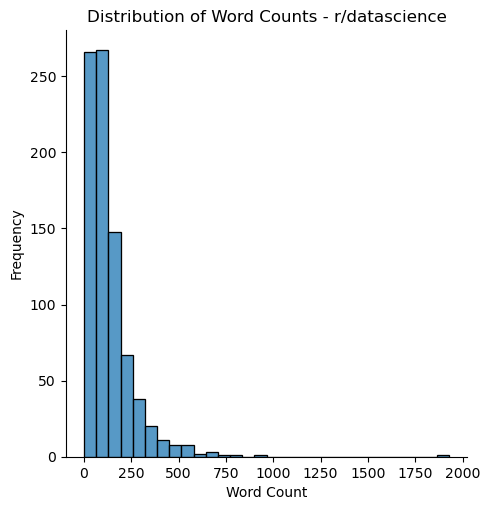

In [59]:
sns.displot(df_post_words_dsc['post_word_count'], kde=False, bins=30)
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Distribution of Word Counts - r/datascience")
plt.show()

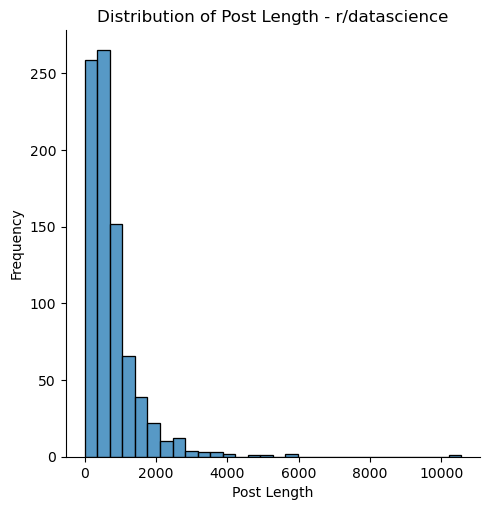

In [60]:
sns.displot(df_post_words_dsc['post_length'], kde=False, bins=30)
plt.xlabel("Post Length")
plt.ylabel("Frequency")
plt.title("Distribution of Post Length - r/datascience")
plt.show()

##### r/dataengineering

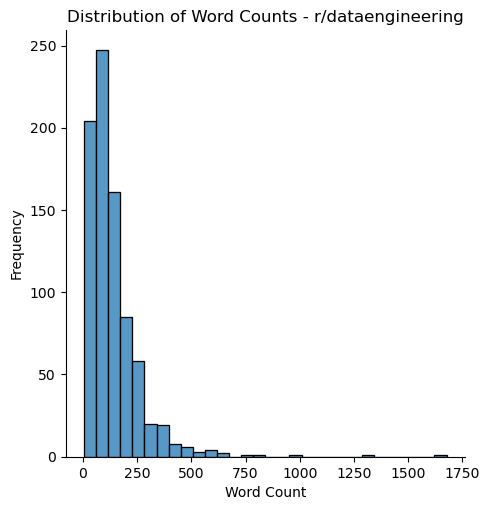

In [61]:
sns.displot(df_post_words_dengr['post_word_count'], kde=False, bins=30)
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Distribution of Word Counts - r/dataengineering")
plt.show()

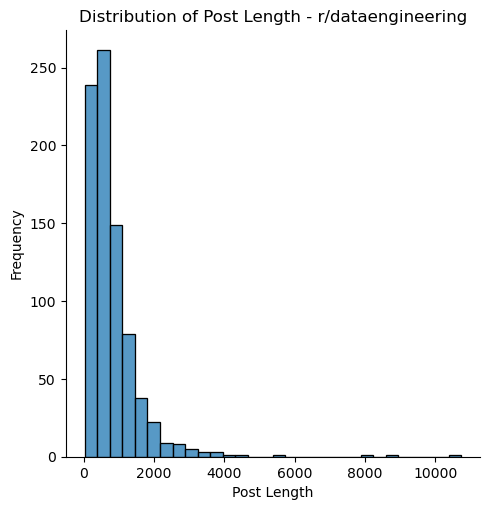

In [62]:
sns.displot(df_post_words_dengr['post_length'], kde=False, bins=30)
plt.xlabel("Post Length")
plt.ylabel("Frequency")
plt.title("Distribution of Post Length - r/dataengineering")
plt.show()

##### Findings
* Comparing post word count vs post length, we can see that the shape and skew of the histograms are quite similar. There is high frequency in the first 5 bins for both distributions, implying that there are more posts with a lower word count and post length.
* Between r/datascience and r/dataengineering, r/datascience has a" greater proportion of shorter posts / fewer words.
* From the histograms, we also observe outliers in both r/datascience and r/dataengineering in terms of word count and post length. However, as this analysis is only for EDA and will not affect our model, we will ignore these outliers.


---
### 2.2.2 Relationship between post length, score, upvote ratio

#### Post Length to Score
Do longer posts have higher scores?<br>
Plot scatter plot of post length to score (with hue for r/datascience and r/dataengineering):

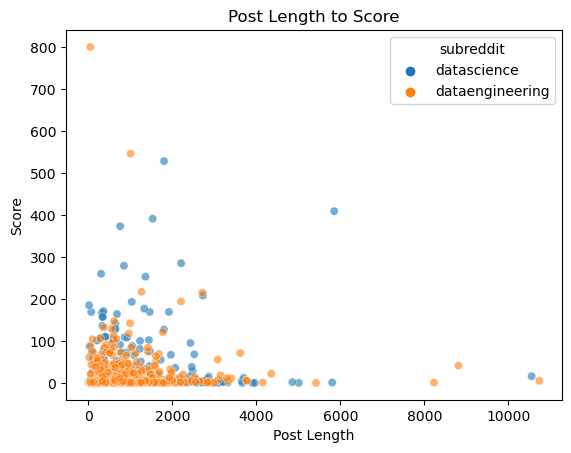

In [63]:
sns.scatterplot(data=df_post_words, x="post_length", y="score", hue="subreddit", alpha=0.6)
plt.xlabel("Post Length")
plt.ylabel("Score")
plt.title("Post Length to Score")
plt.show()

##### Findings
I was expecting longer posts to have higher scores. However, we do not necessarily see such a relationship. In fact almost all the posts of higher post length, have low scores. Data science seems to have more posts with higher scores than data engineering.

---
#### Post Length to Upvote Ratio
Do longer posts tend to receive more upvotes?

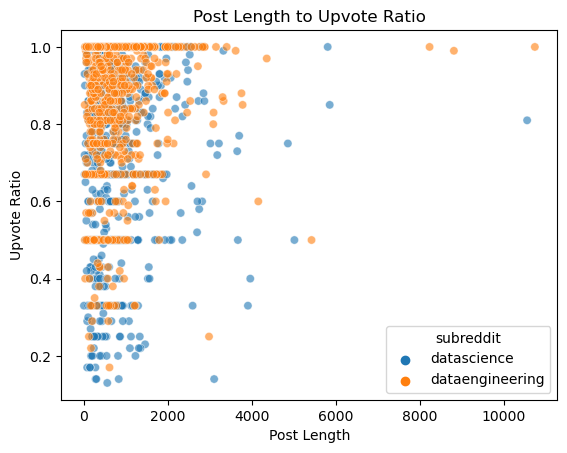

In [64]:
sns.scatterplot(data=df_post_words, x="post_length", y="upvote_ratio", hue="subreddit", alpha=0.6)
plt.xlabel("Post Length")
plt.ylabel("Upvote Ratio")
plt.title("Post Length to Upvote Ratio")
plt.show()

##### Findings
In contrast to postlength vs score, it seems as though a longer post length has some form of correlation to upvote ratio. Data engineering seems to have a larger proportion of posts with upvote ratio above 0.5. Understanding this with the earlier plot, we can infer that data engineering possibly has more posts with scores > 0, but as compared to data science, the scores do not do as well. Whereas for data science, there could be more posts with scores = 0. But posts with scores would have relatively higher scores.

---
#### Upvote Ratio to Score
What is the relationship between upvote ratio to score? 

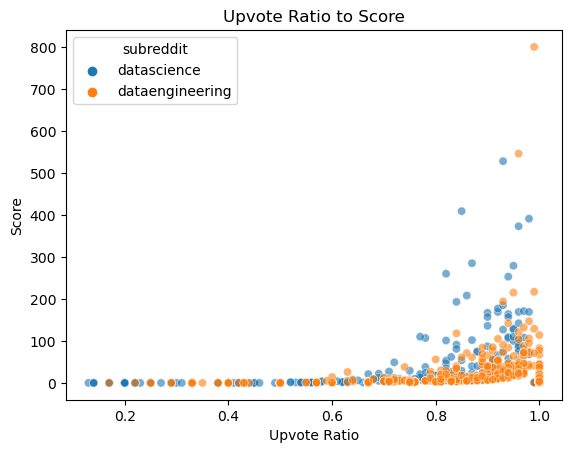

In [65]:
sns.scatterplot(data=df_post_words, x="upvote_ratio", y="score", hue="subreddit", alpha=0.6)
plt.xlabel("Upvote Ratio")
plt.ylabel("Score")
plt.title("Upvote Ratio to Score")
plt.show()

##### Findings
According to __[Reddit FAQ](https://www.reddit.com/wiki/faq/)__, A submission's score is simply the number of upvotes minus the number of downvotes.<br>

By this logic, posts with upvote ratios below 0.5 would be unable to have a score above 0.<br>
Posts with high score would need to get number of upvotes that outweigh the downvotes.

---
### 2.2.3 Category with the most activity
We compared the most popular link-flair-text for each subreddit, which gives us insights to the kind of posts which were most active.

In [66]:
#df for r/datascience
d_sc = df[df['subreddit']=='datascience']

#df for r/dataengr
d_engr = df[df['subreddit']=='dataengineering']

##### r/datascience

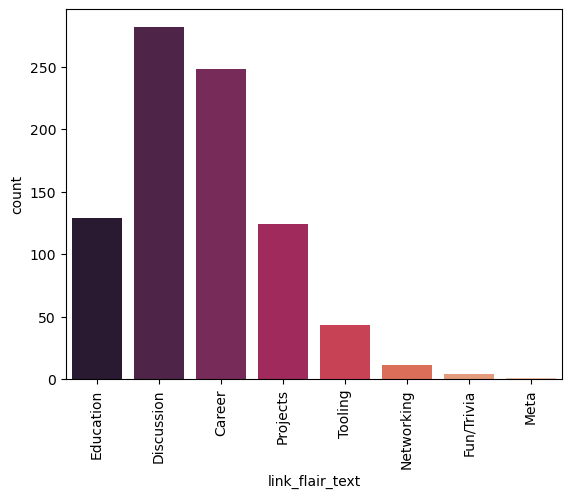

In [67]:
sns.countplot(data=d_sc, x="link_flair_text", palette="rocket")
plt.xticks(rotation=90)
plt.show()

##### r/dataengineering

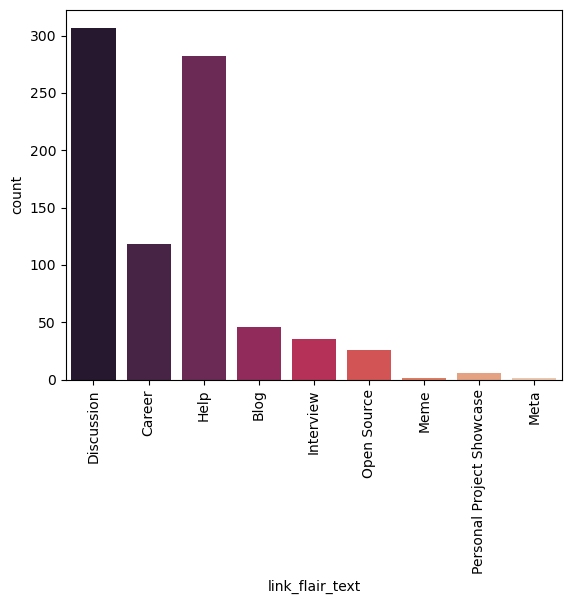

In [68]:
sns.countplot(data=d_engr, x="link_flair_text", palette="rocket")
plt.xticks(rotation=90)
plt.show()

##### Findings
* For both r/datascience and r/dataengineering, the top category was 'Discussion'. This reinforces the GA team's plans to set up a discussion channel to gather feedback and queries from potential students, since there is interest to have further discussions on both r/datascience and r/dataengineering.

---
### 2.2.4 Text Preprocessing Strategy
Before we use text for EDA (and also modelling later on), I decided to pre-process and clean my text, as a clean dataset would allow me to streamline which words are more relevant to each subreddit. Some preprocessing I will perform include:
* Removing special characters and cleanup (done earlier)
* Tokenizing (breaking down sentence to separate words)
* Lemmatizing / Stemming
* Stop Word Removal

---
#### Tokenize, Lemmatize / Stem Text

Let's tokenize the text and add on a new column to the dataframe for tokenized text:

In [69]:
df_clean = df_text

In [70]:
# regex will include words, numbers, and - 
tokenizer = RegexpTokenizer(r"[\w\-]+")

In [71]:
post_tokens = [tokenizer.tokenize(post.lower()) for post in df_clean['title_selftext']]

In [72]:
len(post_tokens)

24874

In [73]:
#Create new column in df
df_clean['tokenized'] = post_tokens
df_clean['tokenized'] = df_clean['tokenized'].apply(lambda row: ' '.join(row))

In [74]:
# Instantiate lemmatizer.
lemmatizer = WordNetLemmatizer()

# Lemmatize tokens.
df_clean['lemmatized'] = [[lemmatizer.lemmatize(word) for word in token_list] for token_list in post_tokens]
df_clean['lemmatized'] = df_clean['lemmatized'].apply(lambda row: ' '.join(row))
df_clean.head()

,subreddit,title_selftext,tokenized,lemmatized
1,1,programmers what are the greatest issues you ...,programmers what are the greatest issues you h...,programmer what are the greatest issue you hav...
2,1,you s hiring managers how diverse is your ap...,you s hiring managers how diverse is your appl...,you s hiring manager how diverse is your appli...
3,1,do i need a masters i am going into my second...,do i need a masters i am going into my second ...,do i need a master i am going into my second y...
4,1,how do you describe your job when someone asks...,how do you describe your job when someone asks...,how do you describe your job when someone asks...
5,1,how i quickly rose to senior data scientist an...,how i quickly rose to senior data scientist an...,how i quickly rose to senior data scientist an...


In [75]:
# Instantiate stemmer.
p_stemmer = PorterStemmer()

# Stem tokens.
df_clean['stemmed'] = [[p_stemmer.stem(word) for word in token_list] for token_list in post_tokens]
df_clean['stemmed'] = df_clean['stemmed'].apply(lambda row: ' '.join(row))
df_clean.head()

,subreddit,title_selftext,tokenized,lemmatized,stemmed
1,1,programmers what are the greatest issues you ...,programmers what are the greatest issues you h...,programmer what are the greatest issue you hav...,programm what are the greatest issu you have w...
2,1,you s hiring managers how diverse is your ap...,you s hiring managers how diverse is your appl...,you s hiring manager how diverse is your appli...,you s hire manag how divers is your applic poo...
3,1,do i need a masters i am going into my second...,do i need a masters i am going into my second ...,do i need a master i am going into my second y...,do i need a master i am go into my second year...
4,1,how do you describe your job when someone asks...,how do you describe your job when someone asks...,how do you describe your job when someone asks...,how do you describ your job when someon ask wh...
5,1,how i quickly rose to senior data scientist an...,how i quickly rose to senior data scientist an...,how i quickly rose to senior data scientist an...,how i quickli rose to senior data scientist an...


##### Findings
* For Lemmatizing, Spacy and WordNetLemmatizer were used, however I found that the results of spacy lemmatizing was same as stemming, so I stuck to using the WordNetLemmatizer instead. In general, lemmatizing does not seem very effective. Some plural words have been reduced to their singular form. However, words in past tense remained the same.
* We will still proceed with lemmatizing for EDA, so our findings are more understandable.
* Stemming is way more aggressive, the stemmed text seems to have alot of spelling errors.

---
### 2.2.5 Feature Word Frequency
Let's explore which words appeared most often within each subreddit. To identify top words, CountVectorizer was used. After every iteration of getting top 20 words, I would filter out certain useless words (unable to help us in classification) to be added on to the list of stop words. The process was repeated several times.

In [76]:
# Function to check if a word contains only English alphabets
def is_english(word):
    return bool(re.match('^[a-zA-Z]+$', word))

# Function to drop non-English words or numbers in the Series
def drop_non_english_and_numbers(series):
    return series.apply(lambda text: ' '.join(word for word in str(text).split() if is_english(word)))

# Convert the 'lemmatized' column to strings
df_clean['lemmatized'] = df_clean['lemmatized'].astype(str)

# Apply the function to the 'lemmatized' column and store the result in a new Series
df_clean = drop_non_english_and_numbers(df_clean['lemmatized'])

Define a function to extract + plot top 20 feature words:

In [77]:
def feat_top(array, file_path):
    # Convert non-string elements to strings
    array = [str(item) for item in array]

    # Setting the vectorizer
    cvec = CountVectorizer(binary=False, stop_words='english')

    # Fitting the vectorizer on lemmatized data
    cvec.fit(array)

    # Transform the corpus.
    array_transformed = cvec.transform(array)

    # Features with stopwords removed
    feature_words = cvec.get_feature_names_out()
    print(f"No: of Feature Words: {len(feature_words)}")

    # File path where you want to save the feature words
    file_path = file_path

    # Open the file in write mode with utf-8 encoding and write the feature words
    with open(file_path, "w", encoding="utf-8") as file:
        for word in feature_words:
            file.write(word + "\n")

    # Create DataFrame with document-term matrix
    array_df = pd.DataFrame(array_transformed.todense(), columns=feature_words)

    # Calculate word frequencies and plot top occurring words
    word_frequencies = array_df.sum().sort_values(ascending=False)
    print(word_frequencies.head(20))

#### r/datascience

In [78]:
d_sc = df_text[df_text['subreddit'] == 1]['lemmatized']
d_sc.head(2)

1    programmer what are the greatest issue you hav...
2    you s hiring manager how diverse is your appli...
Name: lemmatized, dtype: object

In [79]:
#use my earlier function to plot top 20 words for r/dataengineering
feat_top(d_sc, "../data/feature_words_dsc.txt")

No: of Feature Words: 17110
data       7514
job        3057
like       2921
just       2848
work       2648
wa         2476
science    2279
time       2140
people     1997
model      1869
use        1867
need       1773
know       1751
good       1733
company    1708
python     1698
think      1684
want       1621
year       1538
make       1481
dtype: int64


#### r/dataengineering

In [80]:
d_engr = df_text[df_text['subreddit'] == 0]['lemmatized']
d_engr.head()

0    monthly general discussion aug this thread is ...
1    quarterly salary discussion jun this is a recu...
2    what replaced cube i am fairly old school with...
3    is traditional data modeling dead a someone wh...
4    lot of people seem to hate data engineering is...
Name: lemmatized, dtype: object

In [81]:
#use my earlier function to plot top 20 words for r/dataengineering
feat_top(d_engr, "../data/feature_words_dengr.txt")

No: of Feature Words: 15555
data        8901
like        2759
just        2607
use         2246
work        2195
wa          2107
need        1950
sql         1918
time        1791
job         1761
company     1651
tool        1426
engineer    1410
table       1377
know        1374
want        1370
thing       1342
using       1325
good        1324
python      1250
dtype: int64


##### Findings
From the initial extraction of the top 20 words, we can tell that there are some similar words between both subreddits. Words like 'data', 'job', 'company', 'time' are words that would be common for a data-related industry / career. However, as these words do not help us differentiate between data science and data engineering, we could add them to stopwords to reduce noise. Words like 'like', 'just', 'use', 'work', 'need' are even more generic and should be omitted from the model as well.

So far, we only see 2 instances of technical terms 'python' and 'sql' being used in r/datascience and r/dataengineering respectively. Technical terms could be effective in helping us categorise data science vs engineering, as the skill set between both roles are quite different. However, from our problem statement point of view where we are considering comments from a GA open discussion platform, it is important to consider that potential applicants interested in bootcamps may not have technical knowledge of the field.

---
#### Finding similar words between both sets of feature words:

In [82]:
# Read the feature words from the files into Python sets
with open("../data/feature_words_dsc.txt", "r", encoding="utf-8") as file_dsc:
    feature_words_dsc = set([line.strip() for line in file_dsc])

with open("../data/feature_words_dengr.txt", "r", encoding="utf-8") as file_dengr:
    feature_words_dengr = set([line.strip() for line in file_dengr])

# Find the similar words between d_sc and d_engr
similar_words = feature_words_dsc.intersection(feature_words_dengr)
print(len(similar_words))
print(similar_words)

9521
{'odbc', 'automating', 'read', 'abstracting', 'corresponds', 'offender', 'dashboard', 'middle', 'integration', 'staring', 'airline', 'todo', 'comfortable', 'ordinal', '_df', 'case', 'nlp', 'seaborn', 'cliche', 'tldr', 'cleaned', 'misunderstanding', 'evolved', 'involved', 'craft', 'course', 'id', 'practitioner', 'gpt', 'irrelevant', 'legacy', 'duty', 'curiosity', 'validity', 'precise', 'thst', 'internationally', 'admission', 'competency', 'bonus', 'branding', 'potentially', 'increasing', 'capturing', 'pedal', 'indifferent', 'unknown', 'backwards', 'voucher', 'notifying', 'integrating', 'trait', 'asking', 'gauss', 'postgres', 'dollar', 'parallelization', 'pertaining', 'unload', 'developer', 'unqualified', 'profound', 'backend', 'dataengineering', 'shoulder', 'researched', 'incident', 'jd', 'calculate', 'severe', 'concept', 'approaching', 'corr', 'weaker', 'config', 'truthful', 'figure', 'enables', 'integrated', 'ein', 'interchangeable', 'airtable', 'payer', 'producing', 'dog', 'stee

Was considering to add these in the stop word list, since these words that appear in both subreddits will not help us in classification. However, upon adding the entire set of words to my stop list, my base model score test score fell by 0.12. This is probably because omitting the large amount of similar words would mean that we have quite alot of data loss. Also, this would lead to alot of crucial two-gram or three-gram words being lost.

---
#### Editing stop word list
To improve the above list of top 20 words, I appended some additional words to the original list of english stopwords. Stop words are commonly used in NLP to eliminate words that are so widely used that they carry very little useful information.

In [83]:
# Print original list of English stopwords.
og_stopwords = stopwords.words("english")
og_stopwords = [word.replace("'", "") for word in og_stopwords]
len(og_stopwords)

179

In [84]:
#Add on new stopwords + similar_words to list
new_stopwords = ['wa', 'year', 'want', 'know', 'use', 'need', 'like', 'im', 'would', 'get', 'also',
                'one', 'using', 'ive', 'ha', 'de', 'even', 'lot', 'data', 'company', 'work', 'time', 'job'
                'python', 'make', 'think', 'thing', 'could', 'experience', 'really', 'much', 'way', 'doe'] 
final_stopwords = og_stopwords + new_stopwords

In [85]:
len(final_stopwords)

211

After several rounds of running the feature function and adding on to stopwords. We arrive at a revised feature words function, to help us plot the top feature words:

In [86]:
def feat_plot(array, plt_title, file_path):
    # Convert non-string elements to strings
    array = [str(item) for item in array]

    # Setting the vectorizer
    cvec = CountVectorizer(binary=False, stop_words=final_stopwords)

    # Fitting the vectorizer on lemmatized data
    cvec.fit(array)

    # Transform the corpus.
    array_transformed = cvec.transform(array)

    # Features with stopwords removed
    feature_words = cvec.get_feature_names_out()
    print(f"No: of Feature Words: {len(feature_words)}")

    # File path where you want to save the feature words
    file_path = file_path

    # Open the file in write mode with utf-8 encoding and write the feature words
    with open(file_path, "w", encoding="utf-8") as file:
        for word in feature_words:
            file.write(word + "\n")

    # Create DataFrame with document-term matrix
    array_df = pd.DataFrame(array_transformed.todense(), columns=feature_words)

    # Calculate word frequencies and plot top occurring words
    word_frequencies = array_df.sum().sort_values(ascending=False)
    print(word_frequencies.head(20))
    word_frequencies.head(20).plot(kind='barh')
    plt.title(plt_title);

No: of Feature Words: 17236
job          3057
science      2279
people       1997
model        1869
good         1733
python       1698
scientist    1169
role         1139
project      1128
learning     1094
going        1064
better       1024
code          969
take          964
well          963
something     952
learn         933
go            924
find          902
problem       877
dtype: int64


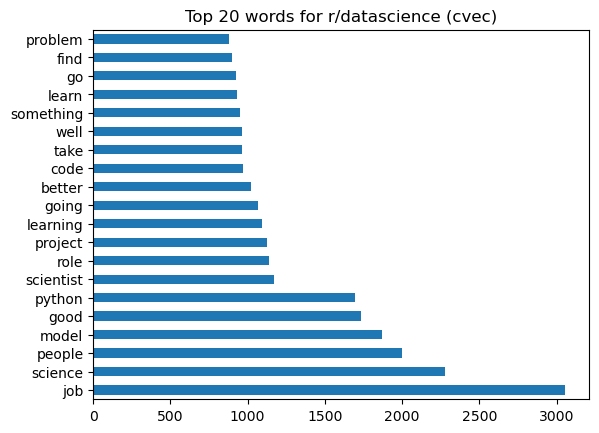

In [87]:
#ROUND 2
#use my earlier function to plot top 20 words for r/dataengineering
feat_plot(d_sc, 'Top 20 words for r/datascience (cvec)', "../data/feature_words_dsc.txt")

No: of Feature Words: 15690
sql            1918
job            1761
tool           1426
engineer       1410
table          1377
good           1324
python         1250
code           1247
engineering    1233
people         1204
pipeline       1186
team           1114
file            963
project         948
database        941
something       939
source          889
cloud           881
new             865
well            858
dtype: int64


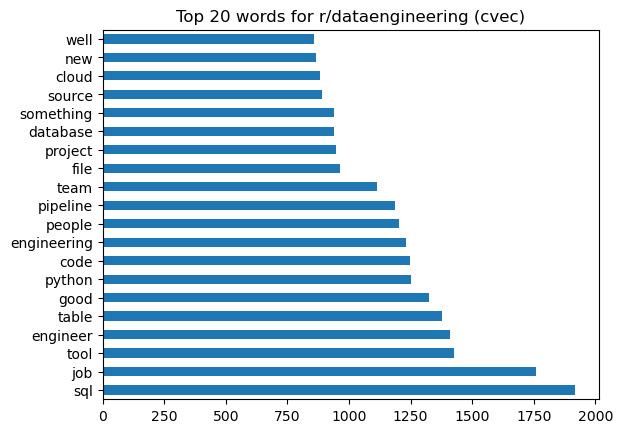

In [88]:
#use my earlier function to plot top 20 words for r/dataengineering
feat_plot(d_engr, 'Top 20 words for r/dataengineering (cvec)', "../data/feature_words_dengr.txt")

#### Findings
Regeneration of top words after filtering out stopwords allowed us to see a greater variety of text that of relevance. For data engineering especially, we see more terms specific to the specialization itself - 'cloud', 'database', 'pipeline' etc. This would be relevant to distinguishing both roles.

---
### 2.2.6 Explore n-grams
Create a function to get top words-groups for various n-grams

In [89]:
#Define the function for 2grams
def two_gram(array):
    # Setting the vectorizer
    cvec = CountVectorizer(stop_words=final_stopwords, ngram_range=(2, 2))  # Missing closing parenthesis here
    cvec.fit(array)
    array_transformed = cvec.transform(array)

    # Features with stopwords removed
    feature_twograms = cvec.get_feature_names_out()

    # File path where you want to save the feature words
    file_path = f"../data/feature_twograms.txt"

    # Create DataFrame with document-term matrix
    array_df = pd.DataFrame(array_transformed.todense(), columns=feature_twograms)

    # Calculate word frequencies and plot top occurring words
    twogram_freq = array_df.sum().sort_values(ascending=False)
    print(twogram_freq.head(20))
    twogram_freq.head(20).plot(kind='barh')

#### r/datascience

In [90]:
d_sc_twogram = df_text[df_text['subreddit'] == 1]['lemmatized']

machine learning       371
entry level            175
job market             152
computer science       148
master degree          120
deep learning          117
linear algebra         115
hiring manager         112
good luck              108
confidence interval    104
open source             89
real world              85
neural network          81
grad school             80
power bi                79
many people             79
linear regression       76
find job                75
master program          74
domain knowledge        73
dtype: int64


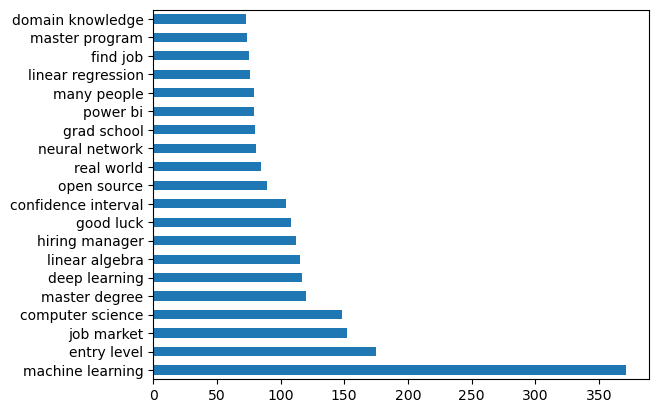

In [91]:
#use function to get top twograms
two_gram(d_sc_twogram)

#### r/dataengineering

open source             279
power bi                186
sql server              131
ci cd                   126
software engineering    117
best practice           114
software engineer       111
tech stack              109
python sql              108
delta lake              101
sql python               98
star schema              83
window function          81
entry level              80
bi tool                  80
parquet file             79
python script            78
low code                 75
sql query                74
machine learning         69
dtype: int64


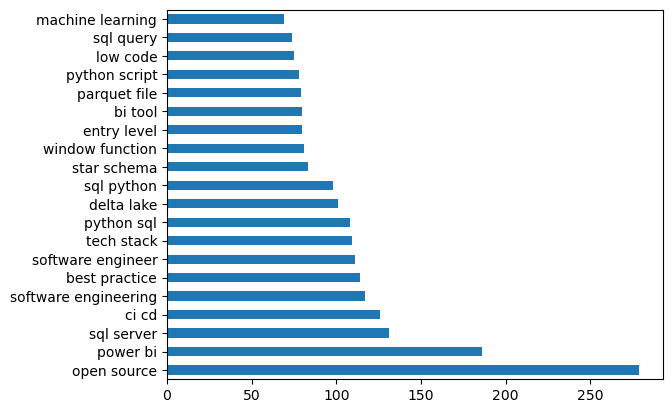

In [92]:
d_engr_twogram = df_text[df_text['subreddit'] == 0]['lemmatized']
two_gram(d_engr_twogram)

The two-grams analysis of text proved to be interesting, it is able to highlight even more relevant pair-words. We see an increase in technical phrases that are specific to r/datascience and r/dataengineering. Examples are "confidence interval", "linear regression", "power bi", etc for data science, and "ci cd", "parquet file", "star schema", etc for data engineering. This would be useful to filter comments from people who have some idea of either roles, who participate in GA's future open discussion platform. This could help highlight people of higher interest, since they have done additional reading on their own to even know these terminologies.

Additionally, in the plots above, we also see more generic phrases that would be useful to GA too.

---
### 2.2.7 Adding on to stopwords list
Based on reviewing the top words / twograms and making comparisen between subreddits, we can then select words which are irrelevant or too common between both subreddits and add these words to stopwords:

In [93]:
# Print original list of English stopwords.
og_stopwords = stopwords.words("english")
og_stopwords = [word.replace("'", "") for word in og_stopwords]
len(og_stopwords)

179

In [94]:
#Add on new stopwords + similar_words to list
new_stopwords = ['wa', 'year', 'want', 'know', 'use', 'need', 'like', 'im', 'would', 'get', 'also',
                'one', 'using', 'ive', 'ha', 'de', 'even', 'lot', 'data', 'company', 'work', 'time', 'job'
                'python', 'make', 'think', 'thing', 'could', 'engineer', 'engineering', 'science', 'wa', 'like', 'just',
                'project', 'doe', 'experience', 'really', 'much', 'way'] 

In [95]:
final_stopwords = og_stopwords + new_stopwords

In [96]:
len(final_stopwords)

218

In [97]:
# Save the array of stopwords to txt file
file_path = "../data/final_stopwords.txt"
np.savetxt(file_path, final_stopwords, fmt="%s", delimiter=" ")

---
## 2.3 Sentiment Analysis

In [98]:
sentm_analysis_dsc = df_text[df_text['subreddit'] == 1][['subreddit', 'title_selftext']].sample(n=1000, random_state=42)
print(sentm_analysis_dsc.shape)
sentm_analysis_dsc.head()

(1000, 2)


,subreddit,title_selftext
2938,1,you will go far with that attitude
364,1,best resources to learn about etl pipelines i...
9,1,disaster job or imposter syndrome hi all for...
6515,1,is great as long as you leave it out of any pr...
293,1,harnham released their data salary findings fo...


In [99]:
sentm_analysis_dengr = df_text[df_text['subreddit'] == 0][['subreddit', 'title_selftext']].sample(n=1000, random_state=42)
print(sentm_analysis_dengr.shape)
sentm_analysis_dengr.head()

(1000, 2)


,subreddit,title_selftext
5621,0,no you are right mike guessed that by your us...
5527,0,noted do you suggest any reasons please
7515,0,i enjoy coding and building real software muc...
1213,0,yeah probablythe same i had faced in the past ...
9422,0,love that there is a term for this


In [100]:
analyzer = SentimentIntensityAnalyzer()

In [101]:
# Function to calculate sentiment compound score
def calc_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

In [102]:
#feature engineer a column for sentiment score
sentm_analysis_dsc['sentiment_score'] = sentm_analysis_dsc['title_selftext'].apply(calc_sentiment)
sentm_analysis_dengr['sentiment_score'] = sentm_analysis_dengr['title_selftext'].apply(calc_sentiment)

In [103]:
def is_positive(df):
    threshold = 0.05
    df['is_positive'] = df['sentiment_score'].apply(lambda score: 1 if score > threshold else 0)

In [104]:
is_positive(sentm_analysis_dsc)
is_positive(sentm_analysis_dengr)

In [105]:
sentm_analysis_dsc.head()

,subreddit,title_selftext,sentiment_score,is_positive
2938,1,you will go far with that attitude,0.0000,0
364,1,best resources to learn about etl pipelines i...,0.9601,1
9,1,disaster job or imposter syndrome hi all for...,0.9932,1
6515,1,is great as long as you leave it out of any pr...,0.5994,1
293,1,harnham released their data salary findings fo...,0.7783,1


In [106]:
sentm_analysis_dengr.head()

,subreddit,title_selftext,sentiment_score,is_positive
5621,0,no you are right mike guessed that by your us...,-0.7096,0
5527,0,noted do you suggest any reasons please,0.3182,1
7515,0,i enjoy coding and building real software muc...,0.3353,1
1213,0,yeah probablythe same i had faced in the past ...,0.7003,1
9422,0,love that there is a term for this,0.6369,1


In [107]:
sentm_analysis_dsc.describe()

,subreddit,sentiment_score,is_positive
count,1000.0,1000.000000,1000.00000
mean,1.0,0.314766,0.64000
std,0.0,0.466378,0.48024
min,1.0,-0.990200,0.00000
25%,1.0,0.000000,0.00000
50%,1.0,0.364450,1.00000
75%,1.0,0.726900,1.00000
max,1.0,0.999600,1.00000


In [108]:
sentm_analysis_dengr.describe()

,subreddit,sentiment_score,is_positive
count,1000.0,1000.000000,1000.000000
mean,0.0,0.309614,0.633000
std,0.0,0.462803,0.482228
min,0.0,-0.959200,0.000000
25%,0.0,0.000000,0.000000
50%,0.0,0.361200,1.000000
75%,0.0,0.712125,1.000000
max,0.0,0.995500,1.000000


##### Findings

While our problem statement only requires us to develop a natural language processing (NLP) model that can automatically classify comments into two distinct categories of Data Science and Data Engineering, sentiment analysis would be able to provide further insights on the demand for a new data engineering course. <br>

This quick sentiment analysis study shows that the comments and posts in the subreddits had an average sentiment of 64% and 63% positive sentiments for data science and engineering respectively. This is good for GA, as it shows that people currently working or are planning to work in these fields are positive about the roles as a whole (as compared to other industries where subreddits are visibly and mostly negative). <br>

However, this quick study was just to provide an idea on sentiments, a more detailed sentiment analysis should be done. Reliability of VADER has to be established, possibly by manually reviewing a sample of VADER's classifications to ensure accuracy.

---
## 2.4 Notebook Summary

#### Data Inspection and Cleaning
* In notebook 2, data inspection and cleaning was done first. General cleaning (missing values, duplicates) and text-based cleaning was done. Some of the text-based cleaning includes lowercasing the data, removing Puncuatations, removing Numbers, removing extra space, replacing the repetitions of punctations, removing emojis, emoticons, removing http links, converting contractions.
* These cleaning processes are crucial to remove as much noise as possible, to allow our model to identify stronger text relationships to our subreddits. At the end of cleaning, we arrived at a dataset of 25502 posts/comments (datascience: 13052, dataengineering: 12450).

#### EDA
* EDA was split into 3 main sections: Post Attributes-related, Text-related, Sentiment Analysis. Below are some insights gained from the respective sections.
  
##### Post Attributes-related
* r/dataengineering seems to have slightly more recent activity (more edited, saved, stickied posts) - As data engineering is the newer branch of data science, there could be more interest and discussion around it.
* r/datascience has more unique authors than r/dataengineering (852 users vs 776 users) - likely because data science is the more established field which people would be more familiar with.
* r/datascience seems to have more posts with higher scores than r/dataengineering. But r/dataengineering has a larger proportion of posts with upvote ratio above 0.5, meaning more posts have scores > 0.
* For both r/datascience and r/dataengineering, the top category was 'Discussion'. This reinforces the GA team's plans to set up a discussion channel to gather feedback and queries from potential students, since there is interest to have further discussions on both r/datascience and r/dataengineering.


##### Text-related
* Top 20 words, and two-grams were extracted for both subreddits
* We see some technical terms being highlighted for each subreddit's text, examples are "python", "confidence interval", "linear regression", "power bi", etc for data science, and "sql", "ci cd", "parquet file", "star schema", etc for data engineering. This could help GA highlight people of higher interest, since we can infer that people who use these words on GA's discussion platform are likely to have done additional reading on their own to even know these terminologies.
* We also analysed for similar words between both subreddits, these words were added to stopwords to reduce noise during training of our model later on.

##### Sentiment Analysis
* Comments and posts in the subreddits had an average sentiment of 64% and 63% positive sentiments for data science and engineering respectively
* This is good for GA, as it shows that people currently working or are planning to work in these fields are positive about the roles as a whole (as compared to other industries where subreddits are visibly and mostly negative). We can expect an increase in people interested to do a bootcamp to enter these roles.


*Is EDA enough to address our problem statement?*<br>
Upon concluding EDA, we have gained initial insights into the levels of interest in data science and data engineering. This aids General Assembly in solidifying the value proposition of establishing a discussion platform for existing students and prospective individuals keen on enrolling in GA bootcamps. However, in order to fully address the root concern that sorting and categorizing comments from the discussion platform would be time-consuming and impractical if done manually, we would still need to develop a natural language processing (NLP) model that can automatically classify the comments into two distinct categories: Data Science and Data Engineering. Only after modelling would we be able to meet the main objective of the problem statement.